In [1]:
from utils.graphutils import Graph, Node, create_county_adjacency_dict_fips, create_voting_data_list
import networkx as nx
import random
from utils.polya_process import polya
import time
import matplotlib.pyplot as plt
import utils.population
import pandas as pd
from utils.voting_utils import *


[698, 698, 698, 698, 698, 733, 733, 733, 733, 733, 838, 838, 838, 838, 838, 776, 776, 776, 776, 776, 648, 648, 648, 648, 648, 777, 777, 777, 777, 777, 758, 758, 758, 758, 758, 794, 794, 794, 794, 794, 762, 762, 762, 762, 762, 806, 806, 806, 806, 806, 777, 777, 777, 777, 777, 828, 828, 828, 828, 828, 721, 721, 721, 721, 721, 584, 584, 584, 584, 584, 492, 492, 492, 492, 492, 362, 362, 362, 362, 362, 229, 229, 229, 229, 229, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56]


In [2]:

#Set Initial Values
state_to_graph = 'Florida'
start_year = 2000   # Note: year MUST be a multiple of 4
end_year = 2004

#Get County Adjacency Matrix
neighbours = create_county_adjacency_dict_fips("data\countyadj.csv")
#populations = population.get_population_data(state=state_name,year=start_year)

#Get FIPS (IDs) data for every county
county_fips = pd.read_csv('data/fips.csv',dtype=str, encoding='utf-8').set_index(["STATE","COUNTY"]).drop_duplicates()

#Get voting data
voting_path = "data\countypres.csv"
voting_data = get_votes(pd.read_csv(voting_path), 2020)

#Define Graph variable
county_graph = Graph()

# Initialize graph: 
# - set population, red, blue in each node
# - connect nodes using adjacency matrix
for county in neighbours:
    county_name = county_fips.loc[(county[:2],county[2:])]['CTYNAME']
    state_name = county_fips.loc[(county[:2],county[2:])]['STNAME']
    #print(f"{state_name} {county_name}")

    population = random.uniform(500,10000)  #Eventually, will be = populations[state][county]
    red = voting_data[county]['red']
    blue = voting_data[county]['blue']
    county_graph.add_node(Node(
            id=county,
            county=county_name,
            state=state_name,
            red=red,
            blue=blue,
            population=population,
            neighbours = neighbours[county],
            reinforcement_parameter=10 #This is the initial reinforcement parameter. Will be overwritten once we have the birth function going.
    ))


51775 not in graph, but in map data
51735 not in graph, but in map data
24510 not in graph, but in map data
51510 not in graph, but in map data
51540 not in graph, but in map data
51820 not in graph, but in map data
51595 not in graph, but in map data
51580 not in graph, but in map data
11001 not in graph, but in map data
51760 not in graph, but in map data
51610 not in graph, but in map data
51770 not in graph, but in map data
51550 not in graph, but in map data
51750 not in graph, but in map data
32510 not in graph, but in map data
51600 not in graph, but in map data
51620 not in graph, but in map data
51660 not in graph, but in map data
51530 not in graph, but in map data
51685 not in graph, but in map data
51700 not in graph, but in map data
51840 not in graph, but in map data
51590 not in graph, but in map data
51670 not in graph, but in map data
51740 not in graph, but in map data
51678 not in graph, but in map data
51710 not in graph, but in map data
51520 not in graph, but in m

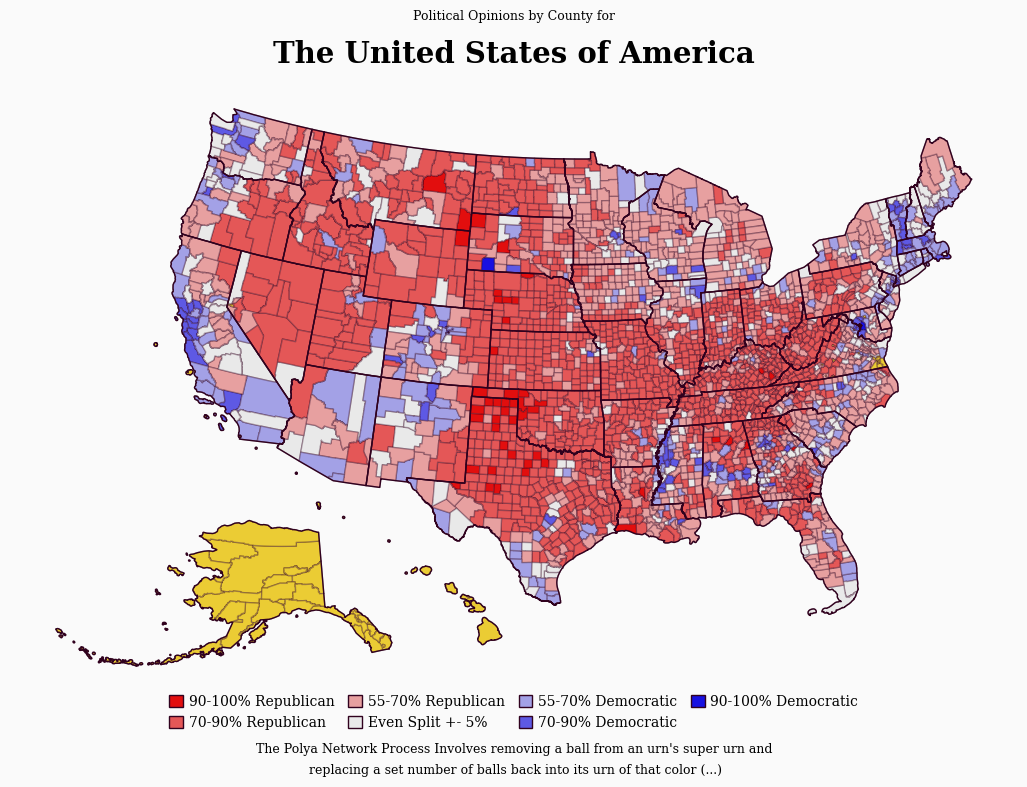

In [3]:
#Display Graph Before Simulation
county_graph.visualize_map(title_size=21,legend_size=10,annotation_size=9,image_size=13)





In [4]:

county_graph, results = polya(county_graph,100)



51775 not in graph, but in map data
51735 not in graph, but in map data
24510 not in graph, but in map data
51510 not in graph, but in map data
51540 not in graph, but in map data
51820 not in graph, but in map data
51595 not in graph, but in map data
51580 not in graph, but in map data
11001 not in graph, but in map data
51760 not in graph, but in map data
51610 not in graph, but in map data
51770 not in graph, but in map data
51550 not in graph, but in map data
51750 not in graph, but in map data
32510 not in graph, but in map data
51600 not in graph, but in map data
51620 not in graph, but in map data
51660 not in graph, but in map data
51530 not in graph, but in map data
51685 not in graph, but in map data
51700 not in graph, but in map data
51840 not in graph, but in map data
51590 not in graph, but in map data
51670 not in graph, but in map data
51740 not in graph, but in map data
51678 not in graph, but in map data
51710 not in graph, but in map data
51520 not in graph, but in m

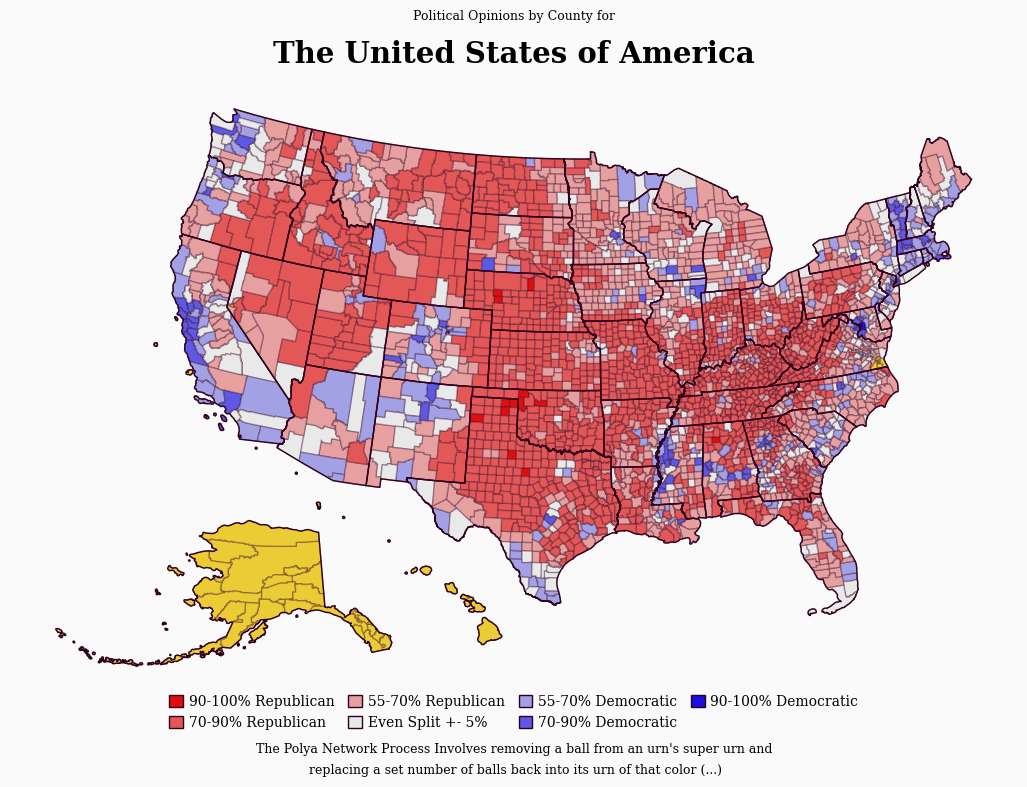

In [5]:
county_graph.visualize_map(title_size=21,legend_size=10,annotation_size=9,image_size=13)
